In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Professional thesis styling
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.figsize': (8, 6),
    'lines.linewidth': 2.5,
    'lines.markersize': 8,
    'axes.linewidth': 1,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'grid.linewidth': 0.8,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
})

# Load and prepare data
df = pd.read_csv("results/clustering_metrics_by_kclusters_2407.csv")

new_row = pd.DataFrame([{
    "ae_recon_loss": 0.0659,
    "ae_silhouette": 0.1719,
    "ae_dbi": 1.3419,
    "bezier_silhouette": 0.1810,
    "bezier_dbi": 1.2655,
    "bezier_mean_l1": 5.1762,
    "transformer_silhouette": 0.2948,
    "transformer_dbi": 0.9525,
    "k_clusters": 70
}])

df = pd.concat([df, new_row], ignore_index=True)
df = df.sort_values("k_clusters").reset_index(drop=True)

k = df["k_clusters"]

# Colors for each method
colors = {
    'Autoencoder': '#1f77b4',
    'Bézier': '#ff7f0e', 
    'Transformer': '#2ca02c'
}

# Create 2x2 subplot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Clustering Performance Analysis Across Different Methods', fontsize=18, y=0.98)

# Plot 1: Autoencoder Reconstruction Loss
ax1.plot(k, df["ae_recon_loss"], 'o-', color=colors['Autoencoder'], 
         markerfacecolor='white', markeredgewidth=2)
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Reconstruction Loss')
ax1.set_title('(a) Autoencoder Reconstruction Loss')

# Plot 2: Bézier Mean L1 Distance
ax2.plot(k, df["bezier_mean_l1"], 's-', color=colors['Bézier'],
         markerfacecolor='white', markeredgewidth=2)
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Mean L1 Distance')
ax2.set_title('(b) Bézier Mean L1 Distance')

# Plot 3: Silhouette Score Comparison
ax3.plot(k, df["ae_silhouette"], 'o-', color=colors['Autoencoder'],
         markerfacecolor='white', markeredgewidth=2, label='Autoencoder')
ax3.plot(k, df["bezier_silhouette"], 's-', color=colors['Bézier'],
         markerfacecolor='white', markeredgewidth=2, label='Bézier')
ax3.plot(k, df["transformer_silhouette"], '^-', color=colors['Transformer'],
         markerfacecolor='white', markeredgewidth=2, label='Transformer')
ax3.set_xlabel('Number of Clusters')
ax3.set_ylabel('Silhouette Score')
ax3.set_title('(c) Silhouette Score Comparison')
ax3.legend()

# Plot 4: Davies-Bouldin Index Comparison
ax4.plot(k, df["ae_dbi"], 'o-', color=colors['Autoencoder'],
         markerfacecolor='white', markeredgewidth=2, label='Autoencoder')
ax4.plot(k, df["bezier_dbi"], 's-', color=colors['Bézier'],
         markerfacecolor='white', markeredgewidth=2, label='Bézier')
ax4.plot(k, df["transformer_dbi"], '^-', color=colors['Transformer'],
         markerfacecolor='white', markeredgewidth=2, label='Transformer')
ax4.set_xlabel('Number of Clusters')
ax4.set_ylabel('Davies-Bouldin Index')
ax4.set_title('(d) Davies-Bouldin Index Comparison')
ax4.legend()

plt.tight_layout()
plt.savefig('clustering_analysis.png', dpi=300)
plt.savefig('clustering_analysis.pdf')
plt.show()

print("Clustering analysis subplot saved as PNG and PDF files.")
print("Use PDF version for your thesis.")


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Circle, Rectangle, FancyArrowPatch
import numpy as np

# Create figure with three subplots
fig = plt.figure(figsize=(15, 10), dpi=300)

# Define colors
pitch_color = '#4a7c59'
run_color = '#dc2677'
walk_color = '#969696'
team_a_color = '#4169E1'
team_b_color = '#dc2677'

# Panel 1: Velocity Segmentation
ax1 = plt.subplot(2, 2, 1)
ax1.set_title('(a) Velocity-Based Segmentation', fontsize=14, weight='bold')

# Generate speed profile
time = np.linspace(0, 5, 100)
speed = np.zeros_like(time)
# Create speed profile with runs and walks
speed[0:20] = 0.5 + 0.5 * np.sin(time[0:20])
speed[20:65] = 2.5 + 0.5 * np.sin(2 * time[20:65])
speed[65:80] = 1.5 - 0.3 * time[65:80]
speed[80:100] = 2.3 + 0.3 * np.cos(time[80:100])

# Plot speed profile
walk_mask = speed < 2.0
run_mask = speed >= 2.0

ax1.plot(time[walk_mask], speed[walk_mask], color=walk_color, linewidth=2, label='Walking')
ax1.plot(time[run_mask], speed[run_mask], color=run_color, linewidth=3, label='Running')

# Add threshold line
ax1.axhline(y=2.0, color='red', linestyle='--', linewidth=1.5, label='Threshold (2.0 m/s)')

# Shade run segments
run_starts = np.where(np.diff(np.concatenate(([False], run_mask, [False]))))[0]
for i in range(0, len(run_starts), 2):
    ax1.axvspan(time[run_starts[i]], time[run_starts[i+1]-1], alpha=0.2, color=run_color)
    ax1.text((time[run_starts[i]] + time[run_starts[i+1]-1])/2, 0.2, f'Run {i//2 + 1}', 
             ha='center', fontsize=10)

ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Speed (m/s)', fontsize=12)
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 3.5)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right')

# Panel 2: Spatial Standardization
ax2 = plt.subplot(2, 2, 2)
ax2.set_title('(b) Spatial Standardization', fontsize=14, weight='bold')
ax2.set_xlim(-0.5, 7)
ax2.set_ylim(-0.5, 3)
ax2.axis('off')

# Original pitch
original_pitch = Rectangle((0, 0.5), 3, 2, facecolor=pitch_color, alpha=0.3, edgecolor='black')
ax2.add_patch(original_pitch)
ax2.plot([1.5, 1.5], [0.5, 2.5], 'k-', linewidth=1)

# Original trajectory
ax2.arrow(0.5, 1, 1.5, 1, head_width=0.1, head_length=0.1, fc=run_color, ec=run_color)
ax2.text(0.5, 0.8, '$(x,y)$', fontsize=10, color='gray')

# Attack direction
ax2.arrow(1.5, 0.8, 1, 0, head_width=0.05, head_length=0.1, fc=team_a_color, ec=team_a_color)
ax2.text(2, 0.6, 'Attack', fontsize=10, color=team_a_color)

# Arrow between pitches
ax2.arrow(3.2, 1.5, 0.6, 0, head_width=0.1, head_length=0.1, fc='black', ec='black')

# Standardized pitch
standard_pitch = Rectangle((4, 0.5), 3, 2, facecolor=pitch_color, alpha=0.3, edgecolor='black')
ax2.add_patch(standard_pitch)
ax2.plot([5.5, 5.5], [0.5, 2.5], 'k-', linewidth=1)

# Standardized trajectory
ax2.arrow(4.5, 1, 1.5, 1, head_width=0.1, head_length=0.1, fc=run_color, ec=run_color)
ax2.text(4.5, 0.8, '$(x_m,y_m)$', fontsize=10, color='gray')

# Standard attack direction
ax2.arrow(5.5, 0.8, 1, 0, head_width=0.05, head_length=0.1, fc='black', ec='black')
ax2.text(6, 0.6, 'Attack', fontsize=10)

ax2.text(1.5, 0.2, 'Original', fontsize=12, ha='center')
ax2.text(5.5, 0.2, 'Standardized', fontsize=12, ha='center')

# Panel 3: Team Centroid Computation
ax3 = plt.subplot(2, 1, 2)
ax3.set_title('(c) Team Centroid Computation', fontsize=14, weight='bold', pad=10)
ax3.set_xlim(-0.5, 10.5)
ax3.set_ylim(-1.5, 4)
ax3.set_aspect('equal')
ax3.axis('off')

# Pitch
pitch = Rectangle((0, 0), 10, 3, facecolor=pitch_color, alpha=0.2, edgecolor='black', linewidth=2)
ax3.add_patch(pitch)
ax3.plot([5, 5], [0, 3], 'k-', linewidth=1)

# Team A players
team_a_positions = [(2, 0.8), (2.5, 2), (3, 1.5), (3.5, 0.5), (4, 2.3)]
for pos in team_a_positions:
    ax3.add_patch(Circle(pos, 0.1, color=team_a_color, zorder=5))

# Team B players
team_b_positions = [(6, 1), (6.5, 2.5), (7, 0.7), (7.5, 1.8), (8, 1.2)]
for pos in team_b_positions:
    ax3.add_patch(Circle(pos, 0.1, color=team_b_color, zorder=5))

# Centroids
centroid_a = (3, 1.4)
centroid_b = (7, 1.4)
ax3.plot(*centroid_a, marker='*', markersize=15, color=team_a_color, markeredgecolor='white', markeredgewidth=1)
ax3.plot(*centroid_b, marker='*', markersize=15, color=team_b_color, markeredgecolor='white', markeredgewidth=1)

# Running player
runner_pos = (1.5, 2.5)
ax3.add_patch(Circle(runner_pos, 0.1, color=team_a_color, zorder=5))
ax3.arrow(1.5, 2.5, 1, -0.3, head_width=0.1, head_length=0.1, fc=team_a_color, ec=team_a_color)

# Centroid-relative position
ax3.plot([centroid_a[0], runner_pos[0]], [centroid_a[1], runner_pos[1]], 
         'k--', alpha=0.5, linewidth=1)
ax3.text(2.2, 2.0, r'$(x_c,y_c)$', fontsize=12, color=team_a_color)

# Legend
ax3.add_patch(Circle((0.5, -0.5), 0.08, color=team_a_color))
ax3.text(0.8, -0.5, 'Team A players', fontsize=11, va='center')
ax3.add_patch(Circle((0.5, -0.8), 0.08, color=team_b_color))
ax3.text(0.8, -0.8, 'Team B players', fontsize=11, va='center')
ax3.plot(3.5, -0.5, marker='*', markersize=12, color='gray')
ax3.text(3.8, -0.5, 'Team centroid', fontsize=11, va='center')

# Formula
ax3.text(8, -0.5, r'$\mathbf{c} = \frac{1}{n}\sum_{i=1}^{n}\mathbf{p}_i$', fontsize=12)

plt.tight_layout()
plt.savefig('segmentation_process.pdf', dpi=300, bbox_inches='tight')
plt.savefig('segmentation_process.png', dpi=300, bbox_inches='tight')
plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Generic family 'serif' not found because none of the following

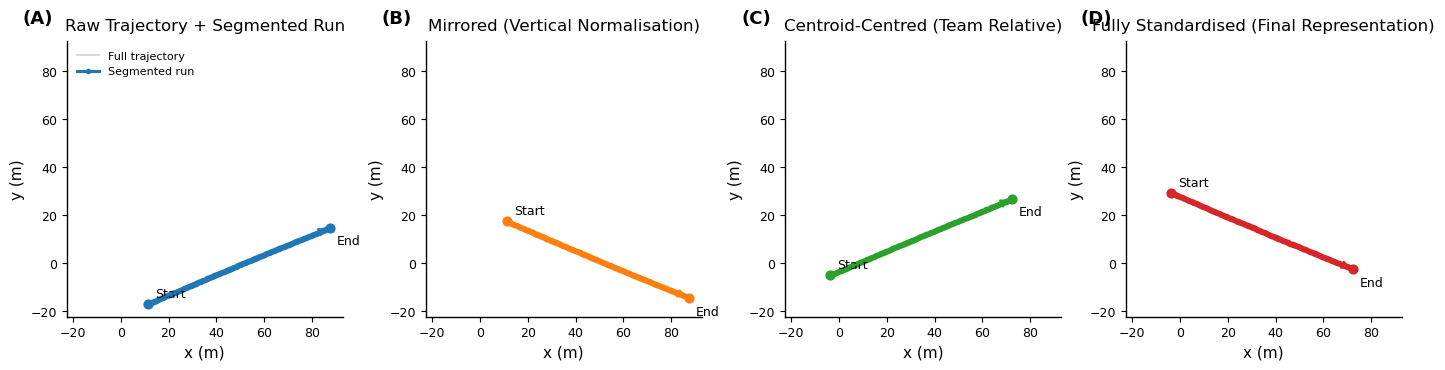

Saved: run_standardisation_pipeline_THEORETICAL.pdf and run_standardisation_pipeline_THEORETICAL.png


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# ============================================================
# CONFIG
# ============================================================
OUTPUT_NAME = "run_standardisation_pipeline_THEORETICAL"
USE_LATEX = False          # switch to False if you don't have LaTeX installed
FIGSIZE = (14, 3.6)
DPI = 300
FPS = 25.0                # synthetic sampling frequency
SPEED_THRESHOLD = 2.0     # m/s for "run" segmentation

import matplotlib as mpl
mpl.rcParams['text.usetex'] = False

# ============================================================
# STYLING
# ============================================================
plt.rcParams.update({
    "figure.figsize": FIGSIZE,
    "savefig.dpi": DPI,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.grid": False,
    "axes.titlesize": 12,
    "axes.labelsize": 11,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "lines.linewidth": 2.2,
    "legend.frameon": False,
    "pdf.fonttype": 42,   # embed fonts
    "ps.fonttype": 42,
})
if USE_LATEX:
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Computer Modern Roman"],
    })

# ============================================================
# 1) CREATE A THEORETICAL TRAJECTORY WITH A FAST "RUN" SEGMENT
# ============================================================
def synthetic_trajectory(seed=7):
    rng = np.random.default_rng(seed)

    # three phases: low-speed (pre), high-speed (run), low-speed (post)
    n1, n2, n3 = 60, 220, 70
    dt = 1.0 / FPS

    # start position
    x0, y0 = 10.0, -18.0

    # phase 1: small, noisy drift
    x1 = x0 + np.cumsum(rng.normal(0.02, 0.01, n1))
    y1 = y0 + np.cumsum(rng.normal(0.01, 0.01, n1))

    # phase 2: fast directed run with some wiggle
    x2 = x1[-1] + np.cumsum(rng.normal(0.35, 0.03, n2))
    y2 = y1[-1] + np.cumsum(rng.normal(0.15, 0.02, n2))

    # phase 3: small, noisy drift again
    x3 = x2[-1] + np.cumsum(rng.normal(0.02, 0.01, n3))
    y3 = y2[-1] + np.cumsum(rng.normal(0.01, 0.01, n3))

    x = np.concatenate([x1, x2, x3])
    y = np.concatenate([y1, y2, y3])
    t = np.arange(len(x)) * dt

    # speed (m/s) from finite differences
    dx = np.diff(x)
    dy = np.diff(y)
    speed = np.concatenate([[0.0], np.sqrt(dx**2 + dy**2) / dt])

    return t, x, y, speed

t, x, y, speed = synthetic_trajectory()

# ============================================================
# 2) SEGMENT THE RUN BY SPEED THRESHOLD (CONTIGUOUS MAX BLOCK)
# ============================================================
def largest_high_speed_block(speed, threshold):
    mask = speed > threshold
    # find largest contiguous True block
    best_len, best_start = 0, None
    start = None
    for i, m in enumerate(mask):
        if m and start is None:
            start = i
        if not m and start is not None:
            length = i - start
            if length > best_len:
                best_len, best_start = length, start
            start = None
    # handle if it ends in True
    if start is not None:
        length = len(mask) - start
        if length > best_len:
            best_len, best_start = length, start
    if best_start is None:
        return None, None
    return best_start, best_start + best_len - 1

run_start, run_end = largest_high_speed_block(speed, SPEED_THRESHOLD)
if run_start is None:
    raise RuntimeError("No segment exceeded the speed threshold — adjust parameters.")

# Slice the "run" we’ll transform
x_run = x[run_start:run_end+1]
y_run = y[run_start:run_end+1]

# ============================================================
# 3) STANDARDISATION STEPS ON THE THEORETICAL RUN
# ============================================================

# (A) Raw: x_run, y_run
# (B) Mirror vertically if mean y < 0
if y_run.mean() < 0:
    y_mirror = -y_run
else:
    y_mirror = y_run.copy()
x_mirror = x_run.copy()

# (C) Centroid-centred: subtract synthetic team centroid at run start
# (choose a fixed centroid to demonstrate the idea)
team_centroid = np.array([15.0, -12.0])
x_c = x_run - team_centroid[0]
y_c = y_run - team_centroid[1]

# Mirror + centroid together
x_mirror_c = x_mirror - team_centroid[0]
y_mirror_c = y_mirror - team_centroid[1]

# (D) Enforce horizontal left-to-right direction
def flip_x_if_needed(xx):
    return -xx if xx[-1] < xx[0] else xx

x_final = flip_x_if_needed(x_mirror_c.copy())
y_final = y_mirror_c.copy()  # vertical already aligned

# ============================================================
# 4) PLOTTING UTILITIES
# ============================================================
def add_start_end_annotations(ax, x_arr, y_arr, color="black", label_start="Start", label_end="End"):
    ax.scatter(x_arr[0], y_arr[0], s=40, color=color, zorder=5)
    ax.annotate(label_start, (x_arr[0], y_arr[0]),
                xytext=(5, 5), textcoords="offset points", fontsize=9)
    ax.scatter(x_arr[-1], y_arr[-1], s=40, color=color, zorder=5)
    ax.annotate(label_end, (x_arr[-1], y_arr[-1]),
                xytext=(5, -12), textcoords="offset points", fontsize=9)
    arrow = FancyArrowPatch(
        (x_arr[0], y_arr[0]), (x_arr[-1], y_arr[-1]),
        arrowstyle="->", mutation_scale=12, linewidth=1.5,
        color=color, zorder=4
    )
    ax.add_patch(arrow)

def pretty_axes(ax, title, xlabel="x (m)", ylabel="y (m)"):
    ax.set_title(title, pad=8)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_aspect("equal", adjustable="box")

def add_panel_label(ax, label):
    ax.text(-0.05, 1.05, label, transform=ax.transAxes,
            fontsize=13, fontweight="bold", va="bottom", ha="right")

def set_common_limits(axes, coords):
    mins = np.min([np.min(c) for c in coords])
    maxs = np.max([np.max(c) for c in coords])
    pad = 0.05 * (maxs - mins)
    for ax in axes:
        ax.set_xlim(mins - pad, maxs + pad)
        ax.set_ylim(mins - pad, maxs + pad)

# ============================================================
# 5) PLOT
# ============================================================
fig, axes = plt.subplots(1, 4, constrained_layout=True)

# Panel A: Show full path (grey) + highlighted run (raw)
axes[0].plot(x, y, color="0.85", linewidth=1.5, label="Full trajectory")
axes[0].plot(x_run, y_run, marker="o", markersize=3, color="tab:blue", label="Segmented run")
add_start_end_annotations(axes[0], x_run, y_run, color="tab:blue")
axes[0].legend(loc="upper left", fontsize=8)
pretty_axes(axes[0], "Raw Trajectory + Segmented Run")
add_panel_label(axes[0], "(A)")

# Panel B: Mirrored
axes[1].plot(x_mirror, y_mirror, marker="o", markersize=3, color="tab:orange")
add_start_end_annotations(axes[1], x_mirror, y_mirror, color="tab:orange")
pretty_axes(axes[1], "Mirrored (Vertical Normalisation)")
add_panel_label(axes[1], "(B)")

# Panel C: Centroid-centred
axes[2].plot(x_c, y_c, marker="o", markersize=3, color="tab:green")
add_start_end_annotations(axes[2], x_c, y_c, color="tab:green")
pretty_axes(axes[2], "Centroid-Centred (Team Relative)")
add_panel_label(axes[2], "(C)")

# Panel D: Fully standardised
axes[3].plot(x_final, y_final, marker="o", markersize=3, color="tab:red")
add_start_end_annotations(axes[3], x_final, y_final, color="tab:red")
pretty_axes(axes[3], "Fully Standardised (Final Representation)")
add_panel_label(axes[3], "(D)")

# Keep comparable scales
coords = [x_run, y_run, x_mirror, y_mirror, x_c, y_c, x_final, y_final]
set_common_limits(axes, coords)

plt.savefig(f"{OUTPUT_NAME}.pdf", bbox_inches="tight")
plt.savefig(f"{OUTPUT_NAME}.png", bbox_inches="tight", dpi=DPI)
plt.show()

print(f"Saved: {OUTPUT_NAME}.pdf and {OUTPUT_NAME}.png")